In [1]:
import matplotlib.pyplot as plt # for plotting and creating figures
import numpy as np # for easy and fast number calculation
from math import tau

import Package4
from Package4 import ImageReader
from Package4 import Fourier
from Package4 import DrawAnimation 

[0.00000000e+00 3.69403569e-04 7.38807138e-04 ... 6.28244650e+00
 6.28281590e+00 6.28318531e+00] [500.98034242 500.58034242 499.98034242 ... 502.98034242 501.98034242
 500.98034242] [861.18872711 861.15363939 861.13742318 ... 861.34766924 861.23697273
 861.18872711]


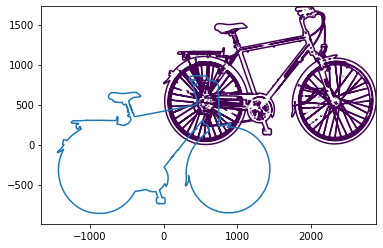

In [7]:
image = ImageReader("velo.jpeg")
time_table, x_table, y_table = image.get_tour()
print(time_table, x_table, y_table)

In [10]:

order = 50

cf = Fourier(time_table, x_table, y_table,order)
fouriercoeff = cf.coef_list(time_table, x_table, y_table, order)

print(fouriercoeff)


[[-5.39360006e-01 -2.07183437e-01]
 [ 1.11987465e+00  4.73690307e-01]
 [-7.84150370e-01  1.66902796e-01]
 [ 7.30071191e-01 -2.74596574e+00]
 [-1.76732730e+00 -1.47488368e+00]
 [ 4.93110536e-01  1.94459969e+00]
 [ 1.87456962e+00 -6.82679245e-02]
 [ 1.35052649e+00 -1.90541567e+00]
 [-9.39968096e-02  1.53615534e+00]
 [ 3.45952270e+00  1.22167853e+00]
 [ 1.18344631e+00  7.75362558e-01]
 [ 6.97426424e-01 -2.67318442e+00]
 [ 8.18608986e-01  8.22175246e-01]
 [-3.22292575e+00  1.92784299e+00]
 [ 3.37042438e-01  9.64905363e-01]
 [ 7.77290397e-01 -2.39350013e+00]
 [-1.24103827e+00  7.22173336e-01]
 [-3.47093082e+00 -1.37493422e-01]
 [ 1.59410956e+00 -2.41422717e+00]
 [-8.90780852e-01 -2.29267340e-02]
 [-1.12607076e+00 -1.77403605e+00]
 [-1.88730054e+00  6.17588287e-01]
 [-2.04794334e+00  1.20162879e+00]
 [ 4.50318234e+00  1.37970454e-01]
 [-4.45107849e-01 -1.55994758e-01]
 [-3.54568044e+00 -3.65735542e+00]
 [ 4.22977774e-03  8.36841795e-01]
 [ 9.75794863e-01  2.29745168e+00]
 [-2.10524188e+00  2

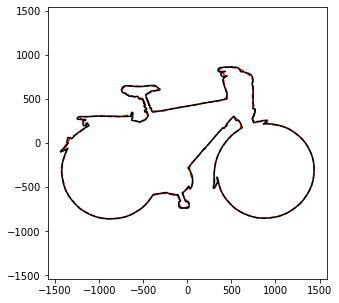

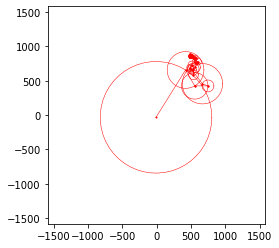

In [11]:
space = np.linspace(0,tau,300)
x_DFT = [cf.DFT(t, fouriercoeff, order)[0] for t in space]
y_DFT = [cf.DFT(t, fouriercoeff, order)[1] for t in space]

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

b = DrawAnimation(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])
anim = b.visualize(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])

#Change based on what writer you have
#HTML(anim.to_html5_video())
#anim.save('pi.mp4',writer='ffmpeg')
anim.save('velo.gif',writer='pillow')